In [2]:
#se importan las librerias para la lectura 
#y procesamiento preliminar de los datos

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn= warn

import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats
import statsmodels.api as sm 

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA,KernelPCA
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
warnings.filterwarnings('ignore')

sns.set_context('notebook')
sns.set_style('white')

In [6]:
Filepath= r"Dataset.csv"
df=pd.read_csv(Filepath)
print(df.head())

                      Time  Latitude  Longitude  Depth/Km  Magnitude
0  2016-08-24 03:36:32.000   42.6983    13.2335       8.1        6.0
1  2016-08-24 03:37:26.580   42.7123    13.2533       9.0        4.5
2  2016-08-24 03:40:46.590   42.7647    13.1723       9.7        3.8
3  2016-08-24 03:41:38.900   42.7803    13.1683       9.7        3.9
4  2016-08-24 03:42:07.170   42.7798    13.1575       9.7        3.6


In [17]:
df.index= pd.to_datetime(df['Time'])

In [21]:
df.drop(columns='Time')

,Latitude,Longitude,Depth/Km,Magnitude
Time,,,,
2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6
...,...,...,...,...
2016-11-30 18:39:27.600,42.8903,13.0197,10.7,2.0
2016-11-30 18:43:14.850,42.9443,13.2003,8.6,2.6
2016-11-30 20:18:27.550,43.0092,13.1288,8.0,2.2


Text(0, 0.5, 'Magnitude')

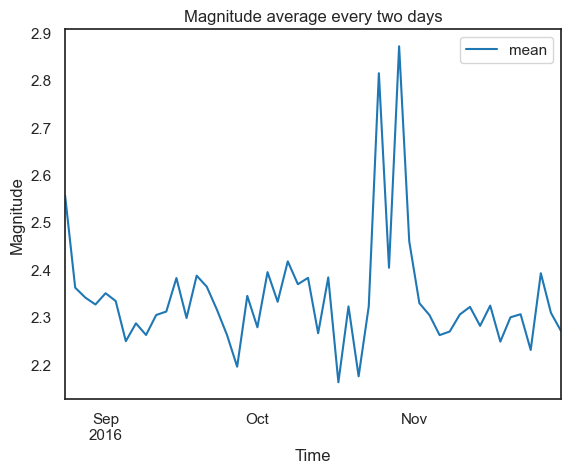

In [26]:
df["Magnitude"].resample("2D").apply([np.mean]).plot()
plt.title("Magnitude average every two days")
plt.ylabel("Magnitude")